*   NAMA : CHAMILLATUL LUQIANA AGUSTIN
*   NIM : 2241720020
*   ABSEN : 09
*   KELAS : TI 3E

# **Praktikum 1**
Klasifikasi Iris dengan Perceptron

**Deskripsi**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

**Langkah 1 - Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Penjelasan:**

Kode program tersebut mengimpor library yang sering digunakan untuk analisis data dan visualisasi:
* **import numpy as np**:
  * Mengimpor library NumPy dan memberikan alias np agar lebih ringkas saat digunakan.
  * NumPy adalah dasar untuk banyak library ilmiah di Python.
  * **Penggunaan**: NumPy digunakan untuk manipulasi data numerik, seperti membuat array, melakukan operasi matematika pada array, dan mengelola data dalam bentuk matriks.
* **import matplotlib.pyplot as plt**:
  * Mengimpor modul pyplot dari library Matplotlib dan memberikan alias plt.
  * Matplotlib adalah library untuk membuat visualisasi data dalam berbagai bentuk, seperti grafik garis, grafik batang, scatter plot, dan sebagainya.
  * **Penggunaan**: Matplotlib digunakan untuk membuat visualisasi data agar lebih mudah dipahami dan dianalisis.
* **import pandas as pd**:
  * Mengimpor library Pandas dan memberikan alias pd.
  * **Penggunaan**: Pandas digunakan untuk membaca, membersihkan, memanipulasi, dan menganalisis data dalam bentuk tabel.
* **import seaborn as sns**:
  * Mengimpor library Seaborn dan memberikan alias sns.
  * **Penggunaan**: Seaborn digunakan untuk membuat visualisasi data yang lebih estetis dan mudah dipahami, seperti heatmap, violin plot, dan pair plot.

---

**Langkah 2 - Load Data dan Visualisasi**

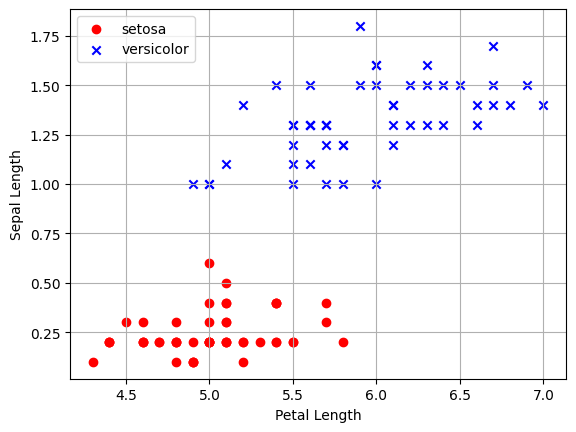

In [3]:
# Membaca data iris dari file CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Penjelasan:**

Kode program tersebut bertujuan untuk memvisualisasikan data bunga Iris dengan menggunakan scatter plot. Secara spesifik, kode ini akan menampilkan sebaran data untuk dua spesies bunga Iris, yaitu Setosa dan Versicolor, berdasarkan panjang sepal dan panjang petal.
* **import pandas as pd dan import matplotlib.pyplot as plt**: Mengimpor library Pandas untuk manipulasi data dan Matplotlib untuk visualisasi data.
* **url = ... dan df = pd.read_csv(url, header=None)**:
  * **url** menyimpan alamat URL dataset Iris yang akan diunduh.
  * **pd.read_csv()** digunakan untuk membaca data dari URL tersebut dan menyimpannya dalam DataFrame bernama df.
  * **header=None** menandakan bahwa dataset tidak memiliki baris header.
* **setosa = ..., versicolor = ..., dan virginica = ...**:
  * Membagi DataFrame df menjadi tiga DataFrame terpisah berdasarkan spesies bunga Iris: setosa, versicolor, dan virginica.
  * **df[df[4] == 'Iris-setosa']** memilih baris-baris dalam df di mana kolom ke-4 (indeks 4) memiliki nilai 'Iris-setosa'.
* **a, b = 0, 3**: Mendefinisikan variabel a dan b yang akan digunakan sebagai indeks kolom untuk data yang akan divisualisasikan.
  * **a = 0** merepresentasikan kolom pertama (panjang sepal).
  * **b = 3** merepresentasikan kolom keempat (panjang petal).
* **plt.scatter(...)**: Membuat scatter plot dengan menggunakan Matplotlib.
  * **plt.scatter(setosa[a], setosa[b], ...)**: Membuat scatter plot untuk spesies Setosa dengan panjang sepal pada sumbu x dan panjang petal pada sumbu y.
  * Argumen color, marker, dan label digunakan untuk mengatur warna, bentuk marker, dan label untuk setiap spesies.
* **plt.xlabel(...), plt.ylabel(...), plt.legend(...), plt.grid()**: Menambahkan label sumbu, legenda, dan grid ke plot untuk memperjelas visualisasi.
* **plt.show()**: Menampilkan plot yang telah dibuat.

---

**Langkah 3 - Membuat Kelas Perceptron**

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Penjelasan:**

Kode program tersebut mendefinisikan sebuah kelas bernama Perceptron yang mengimplementasikan algoritma Perceptron. Algoritma Perceptron adalah salah satu algoritma paling dasar dalam machine learning yang digunakan untuk klasifikasi biner.
* **class Perceptron(object):**: Mendeklarasikan kelas Perceptron.
* **def __init__(self, eta=0.01, n_iter=10):**:
  * Ini adalah konstruktor kelas yang dijalankan saat objek Perceptron dibuat.
  * **eta**: Learning rate (laju pembelajaran) yang mengontrol seberapa besar bobot diperbarui pada setiap iterasi. Nilai default adalah 0.01.
  * **n_iter**: Jumlah iterasi atau epoch dalam proses pelatihan. Nilai default adalah 10.
* **def fit(self, X, y):**:
  * Metode ini digunakan untuk melatih model Perceptron.
  * X: Data latih berupa array NumPy yang berisi fitur-fitur.
  * y: Label atau target yang sesuai dengan data latih.
  * Di dalam metode ini:
    * **self.w_**: Inisialisasi bobot dengan nilai 0. w_[0] adalah bias, dan w_[1:] adalah bobot untuk setiap fitur.
    * **self.errors_**: List untuk menyimpan jumlah kesalahan klasifikasi pada setiap epoch.
    * Loop for untuk melakukan iterasi sebanyak n_iter:
      * **errors**: Variabel untuk menghitung kesalahan pada epoch saat ini.
      * Loop for untuk memproses setiap sampel data (xi, target) dalam data latih:
        * **update**: Menghitung pembaruan bobot berdasarkan kesalahan prediksi.
        * Memperbarui bobot (self.w_) menggunakan learning rate dan pembaruan.
        * Menambahkan kesalahan ke errors jika ada pembaruan bobot.
      * Menambahkan errors ke self.errors_.
    * Mengembalikan objek Perceptron itu sendiri (self).
* **def net_input(self, X):**: Metode ini menghitung net input (input bersih) dari Perceptron, yaitu hasil perkalian dot antara bobot dan fitur ditambah bias.
* **def predict(self, X):**:
  * Metode ini melakukan prediksi kelas berdasarkan net input.
  * Jika net input lebih besar atau sama dengan 0, maka prediksi kelas adalah 1; jika tidak, prediksi kelas adalah -1.
  
---

**Langkah 4 - Pilih Data dan Encoding Label**

In [5]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

**Penjelasan:**

Kode program tersebut bertujuan untuk menyiapkan data latih untuk klasifikasi bunga Iris menggunakan algoritma Perceptron.
* **y = df.iloc[0:100, 4].values**:
  * **Memilih 100 data awal**: Kode ini mengambil 100 baris pertama (indeks 0 hingga 99) dari kolom ke-4 (indeks 4) pada DataFrame df dan menyimpannya dalam variabel y.
  * **Kolom ke-4**: Kolom ini biasanya berisi label kelas atau spesies bunga Iris (misalnya, 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica').
  * **values**: Mengambil nilai-nilai dari data yang dipilih dan mengubahnya menjadi array NumPy.
  * **Variabel y**: Variabel ini sekarang menyimpan label kelas untuk 100 data pertama.
* **y = np.where(y == 'Iris-setosa', -1, 1)**:
  * **Mengganti coding label**: Kode ini mengubah label kelas dalam variabel y menjadi representasi numerik yang sesuai untuk algoritma Perceptron.
  * **np.where(kondisi, nilai_jika_benar, nilai_jika_salah)**: Fungsi ini akan memeriksa setiap elemen dalam array y. Jika elemen tersebut sama dengan 'Iris-setosa', maka akan diganti dengan -1. Jika tidak, akan diganti dengan 1.
  * **Representasi numerik**: Perceptron biasanya bekerja dengan label biner, di mana satu kelas direpresentasikan sebagai -1 dan kelas lainnya sebagai 1.
* **X = df.iloc[0:100, [0, 3]].values**:
  * **Memilih data latih**: Kode ini mengambil 100 baris pertama (indeks 0 hingga 99) dan kolom ke-0 dan ke-3 (indeks 0 dan 3) pada DataFrame df dan menyimpannya dalam variabel X.
  * **Kolom ke-0 dan ke-3**: Kolom-kolom ini biasanya berisi fitur-fitur data, seperti panjang sepal dan panjang petal.
  * **values**: Mengambil nilai-nilai dari data yang dipilih dan mengubahnya menjadi array NumPy.
  * **Variabel X**: Variabel ini sekarang menyimpan fitur-fitur data untuk 100 data pertama.
  
---

**Langkah 5 - Fitting Model**

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

**Penjelasan:**

Kode program tersebut bertujuan untuk membuat dan melatih model Perceptron untuk klasifikasi bunga Iris.
* **ppn = Perceptron(eta=0.1, n_iter=10)**:
  * **Membuat objek Perceptron**: Kode ini membuat objek dari kelas Perceptron yang telah didefinisikan sebelumnya dan menyimpannya dalam variabel ppn.
  * **eta=0.1**: Menentukan learning rate (laju pembelajaran) sebesar 0.1. Learning rate mengontrol seberapa besar bobot model diperbarui pada setiap iterasi pelatihan.
  * **n_iter=10**: Menentukan jumlah iterasi atau epoch pelatihan sebesar 10. Epoch adalah satu kali proses model melihat seluruh data latih.
* **ppn.fit(X, y)**:
  * **Melatih model**: Kode ini memanggil metode fit() pada objek ppn untuk melatih model Perceptron.
  * **X**: Data latih yang berisi fitur-fitur (panjang sepal dan panjang petal) yang telah disiapkan sebelumnya.
  * **y**: Label kelas yang sesuai dengan data latih, yang juga telah disiapkan sebelumnya.
  * **Proses pelatihan**: Metode fit() akan memperbarui bobot model secara iteratif berdasarkan data latih dan label kelas untuk menemukan pola yang memisahkan kelas-kelas bunga Iris.
  
---

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

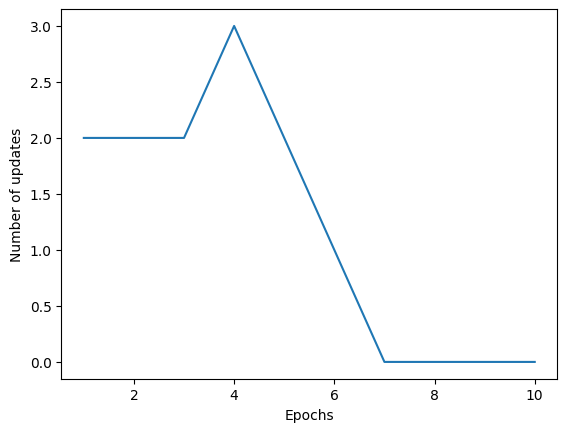

In [7]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**Penjelasan:**

Kode program tersebut bertujuan untuk memvisualisasikan jumlah pembaruan bobot (error) pada setiap epoch selama proses pelatihan model Perceptron.
* **plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)**:
  * **Membuat plot**: Kode ini menggunakan fungsi plot() dari Matplotlib untuk membuat plot garis.
  * **range(1, len(ppn.errors_)+1)**: Menentukan nilai-nilai untuk sumbu x, yaitu nomor epoch, mulai dari 1 hingga jumlah epoch yang telah dilakukan selama pelatihan.
  * **ppn.errors_**: Atribut errors_ pada objek ppn (Perceptron) menyimpan jumlah pembaruan bobot atau kesalahan klasifikasi pada setiap epoch. Nilai-nilai ini digunakan untuk sumbu y.
* **plt.xlabel('Epochs')**: Menambahkan label "Epochs" pada sumbu x.
* **plt.ylabel('Number of updates')**: Menambahkan label "Number of updates" pada sumbu y.
* **plt.show()**: Menampilkan plot yang telah dibuat.

---

**Langkah 7 - Visualiasasi Decision Boundary**

In [8]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

**Penjelasan:**

Kode tersebut bertujuan untuk memvisualisasikan decision region (area keputusan) dari model klasifikasi pada ruang fitur 2 dimensi. Fungsi ini akan menghasilkan plot yang menunjukkan bagaimana model membagi ruang fitur menjadi area yang sesuai dengan kelas-kelas yang berbeda.
* **from matplotlib.colors import ListedColormap**: Mengimpor kelas ListedColormap dari modul matplotlib.colors untuk membuat colormap yang digunakan untuk mewarnai area keputusan.
* **def plot_decision_regions(X, y, classifier, resolution=0.02)**: Mendefinisikan fungsi plot_decision_regions dengan parameter:
  * **X**: Data fitur.
  * **y**: Label kelas.
  * **classifier**: Model klasifikasi yang telah dilatih.
  * **resolution**: Resolusi grid yang digunakan untuk membuat area keputusan (default: 0.02).
* **markers = ('s', 'x', 'o', '^', 'v')**: Mendefinisikan marker yang akan digunakan untuk memplot data point dari kelas yang berbeda.
* **colors = ('r', 'b', 'g', 'k', 'grey')**: Mendefinisikan warna yang akan digunakan untuk marker dan area keputusan.
* **cmap = ListedColormap(colors[:len(np.unique(y))])**: Membuat colormap berdasarkan jumlah kelas unik dalam data.
* **x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1**: Menentukan rentang nilai untuk fitur pertama (x1).
* **x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1**: Menentukan rentang nilai untuk fitur kedua (x2).
* **xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))**: Membuat grid menggunakan np.meshgrid untuk area keputusan.
* **Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)**: Memprediksi label kelas untuk setiap titik grid menggunakan model klasifikasi.
* **Z = Z.reshape(xx1.shape)**: Mengubah bentuk array Z agar sesuai dengan grid.
* **plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)**: Memvisualisasikan area keputusan menggunakan plt.contourf.
* **plt.xlim(xx1.min(), xx1.max())**: Mengatur batas sumbu x.
* **plt.ylim(xx2.min(), xx2.max())**: Mengatur batas sumbu y.
* **plt.ylim(xx2.min(), xx2.max())**:
  * Baris ini mengatur batas sumbu y pada plot agar sesuai dengan rentang nilai fitur kedua (x2) yang digunakan untuk membuat area keputusan.
  * Ini memastikan bahwa semua data point ditampilkan dengan benar pada plot.
* **for i, cl in enumerate(np.unique(y)):**:
  * Loop ini akan memplot data point untuk setiap kelas unik (cl) dalam data.
  * **enumerate(np.unique(y))**: Mendapatkan indeks (i) dan nilai (cl) dari setiap kelas unik dalam data y.
* **plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)**:
  * Fungsi plt.scatter() digunakan untuk memplot data point.
  * **x=X[y==cl, 0]**: Memilih data point untuk fitur pertama (x1) yang termasuk dalam kelas cl.
  * **y=X[y==cl, 1]**: Memilih data point untuk fitur kedua (x2) yang termasuk dalam kelas cl.
  * **alpha=0.8**: Mengatur transparansi marker.
  * **c=cmap(i)**: Mengatur warna marker berdasarkan colormap dan indeks kelas.
  * **marker=markers[i]**: Mengatur marker berdasarkan list markers dan indeks kelas.
  * **label=cl**: Memberikan label untuk kelas pada legend plot

---

# **Praktikum 2**
Klasifikasi Berita dengan Perceptron

**Deskripsi**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu **Sport Hockey, Sport Baseball, dan Otomotif**. Proses klasifikasi akan menggunakan model Perceptron.

**Langkah 1 - Import Library**

In [9]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Penjelasan:**

Kode program tersebut digunakan untuk mengklasifikasikan berita ke dalam beberapa kategori menggunakan algoritma Perceptron.
* **from sklearn.datasets import fetch_20newsgroups**:
  * Mengimpor fungsi fetch_20newsgroups dari library sklearn.datasets.
  * Fungsi ini digunakan untuk mengunduh dataset 20 Newsgroups, yang berisi kumpulan artikel berita dari berbagai kategori.
* **from sklearn.feature_extraction.text import TfidfVectorizer**:
  * Mengimpor kelas TfidfVectorizer dari library sklearn.feature_extraction.text.
  * Kelas ini digunakan untuk mengubah teks berita menjadi representasi numerik yang dapat dipahami oleh model Perceptron. Representasi ini disebut TF-IDF (Term Frequency-Inverse Document Frequency), yang memberikan bobot pada kata-kata berdasarkan seberapa sering muncul dalam dokumen dan seberapa unik kata tersebut di seluruh dataset.
* **from sklearn.linear_model import Perceptron**:
  * Mengimpor kelas Perceptron dari library sklearn.linear_model.
  * Kelas ini merupakan implementasi dari algoritma Perceptron, yang akan digunakan untuk mengklasifikasikan berita.
* **from sklearn.metrics import f1_score, classification_report**:
  * Mengimpor fungsi f1_score dan classification_report dari library sklearn.metrics.
  * Fungsi-fungsi ini digunakan untuk mengevaluasi kinerja model Perceptron setelah dilatih. f1_score mengukur keseimbangan antara presisi dan recall, sedangkan classification_report memberikan laporan yang lebih detail tentang kinerja model, termasuk presisi, recall, F1-score, dan support untuk setiap kategori.
  
---

**Langkah 2 - Pilih Label dan Split Data**

In [10]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

**Penjelasan:**

Kode program tersebut digunakan untuk mengambil dan mempersiapkan data dari dataset 20 Newsgroups untuk keperluan klasifikasi teks.
* **categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']**:
  * Baris ini mendefinisikan variabel categories yang berisi daftar kategori berita yang akan digunakan.
  * Memilih tiga kategori: 'rec.sport.hockey', 'rec.sport.baseball', dan 'rec.autos'. Artinya, kita hanya akan menggunakan data berita yang termasuk dalam salah satu dari tiga kategori ini.
* **newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))**:
  * Baris ini mengunduh dan memuat data latih dari dataset 20 Newsgroups.
  * **subset='train'** menunjukkan bahwa kita mengambil data untuk pelatihan model.
  * **categories=categories** membatasi data yang diambil hanya pada kategori yang telah didefinisikan sebelumnya.
  * **remove=('headers', 'footers', 'quotes')** menghapus bagian header, footer, dan kutipan dari teks berita, karena bagian-bagian ini biasanya tidak relevan untuk klasifikasi.
  * Data latih disimpan dalam variabel newsgroups_train.
* **newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))**:
  * Baris ini melakukan hal yang sama seperti baris sebelumnya, tetapi untuk data uji.
  * **subset='test'** menunjukkan bahwa kita mengambil data untuk menguji kinerja model yang telah dilatih.
  * Data uji disimpan dalam variabel newsgroups_test.
  
---

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [11]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Penjelasan**

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

**Penjelasan:**

Kode program tersebut digunakan untuk melatih model Perceptron untuk melakukan klasifikasi teks pada data berita yang telah dipersiapkan sebelumnya.
* **vectorizer = TfidfVectorizer()**:
   * Baris ini membuat objek vectorizer dari kelas TfidfVectorizer.
  * **TfidfVectorizer** adalah sebuah kelas di scikit-learn yang digunakan untuk menghitung nilai TF-IDF (Term Frequency-Inverse Document Frequency) dari teks.
  * TF-IDF adalah teknik untuk memberikan bobot pada kata-kata berdasarkan seberapa sering muncul dalam dokumen dan seberapa unik kata tersebut di seluruh dataset.
* **X_train = vectorizer.fit_transform(newsgroups_train.data)**:
  * Baris ini menyesuaikan vectorizer dengan data latih (newsgroups_train.data) dan mengubahnya menjadi matriks fitur TF-IDF.
  * **fit_transform() melakukan dua hal**:
    * **fit():** Mempelajari kosakata dan IDF dari data latih.
    * **transform()**: Mengubah data latih menjadi matriks fitur TF-IDF.
  * Hasilnya disimpan dalam variabel X_train.
* **X_test = vectorizer.transform(newsgroups_test.data)**:
  * Baris ini mengubah data uji (newsgroups_test.data) menjadi matriks fitur TF-IDF menggunakan vectorizer yang telah dilatih sebelumnya.
  * **transform()** hanya melakukan transformasi data tanpa mempelajari kosakata dan IDF lagi.
  * Hasilnya disimpan dalam variabel X_test.
* **clf = Perceptron(random_state=11)**:
  * Baris ini membuat objek clf dari kelas Perceptron.
  * **random_state=11** digunakan untuk memastikan hasil yang konsisten saat menjalankan kode berulang kali.
* **clf.fit(X_train, newsgroups_train.target)**: Baris ini melatih model Perceptron (clf) menggunakan data latih (X_train) dan label targetnya (newsgroups_train.target).
* **predictions = clf.predict(X_test)**:
  *Baris ini menggunakan model Perceptron (clf) untuk membuat prediksi pada data uji (X_test).
  * Hasil prediksi disimpan dalam variabel predictions.
* **print(classification_report(newsgroups_test.target, predictions))**:
  * Baris ini mencetak laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, F1-score, dan support untuk setiap kategori.
  * **classification_report()** dari scikit-learn digunakan untuk menghasilkan laporan ini.
  
---

# **Praktikum 3**
Nilai Logika XOR dengan MLP

**Deskripsi**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

**Langkah 1 - Import Library**

In [12]:
from sklearn.neural_network import MLPClassifier

**Penjelasan:**

Kode program tersebut berfungsi untuk mengimpor kelas MLPClassifier dari modul sklearn.neural_network.
* **from sklearn.neural_network**: Ini menunjukkan dari modul/package mana kelas yang ingin diimpor berasal. Dalam hal ini, kelas MLPClassifier berada di dalam modul neural_network yang merupakan bagian dari library sklearn (scikit-learn).
* **import MLPClassifier**: Ini secara spesifik mengimpor kelas MLPClassifier agar dapat digunakan dalam kode program Anda.

---

**Langah 2 - Buat Data**

In [13]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

**Penjelasan:**

Kode program tersebut mendefinisikan dua variabel, y dan X, yang merepresentasikan label dan data yang akan digunakan untuk melatih model machine learning, khususnya untuk kasus logika XOR.
* **y = [0, 1, 1, 0]**:
  * **y**: Variabel ini menyimpan label atau target yang ingin diprediksi oleh model.
  * **[0, 1, 1, 0]**: Ini adalah list yang berisi label untuk setiap data point. Dalam konteks logika XOR, nilai 0 merepresentasikan output False dan nilai 1 merepresentasikan output True.
* **X = [[0, 0], [0, 1], [1, 0], [1, 1]]**:
  * **X**: Variabel ini menyimpan data input yang akan digunakan untuk melatih model.
  * **[[0, 0], [0, 1], [1, 0], [1, 1]]**: Ini adalah list of lists yang merepresentasikan 4 data point. Setiap data point memiliki dua fitur, dan setiap fitur dapat bernilai 0 atau 1. Kombinasi nilai-nilai ini merepresentasikan input untuk gerbang logika XOR.

---

**Langkah 3 - Fit Model**

In [14]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

**Penjelasan:**

Kode tersebut bertujuan untuk melatih model MLP agar dapat mempelajari pola logika XOR dari data yang diberikan (X dan y). Setelah proses pelatihan selesai, model (clf) dapat digunakan untuk memprediksi output XOR dari input baru.
* **clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)**:
  * **clf**: Variabel ini akan menyimpan objek dari kelas MLPClassifier, yang merepresentasikan model MLP.
  * **MLPClassifier(...)**: Ini adalah konstruktor dari kelas MLPClassifier yang digunakan untuk membuat model dengan konfigurasi tertentu.
    * **solver='lbfgs'**: Menentukan algoritma optimasi yang digunakan untuk melatih model. 'lbfgs' adalah algoritma yang cocok untuk dataset kecil.
    * **activation='logistic'**: Menentukan fungsi aktivasi yang digunakan pada hidden layer. 'logistic' adalah fungsi sigmoid.
    * **hidden_layer_sizes=(2,)**: Menentukan arsitektur hidden layer. Dalam hal ini, model memiliki satu hidden layer dengan 2 neuron.
    * **max_iter=100**: Menentukan jumlah maksimum iterasi (epoch) dalam proses pelatihan.
    * **random_state=20**: Menentukan seed untuk generator angka acak, sehingga hasil pelatihan dapat direproduksi.
* **clf.fit(X, y)**:
  * **fit(...)**: Ini adalah metode dari kelas MLPClassifier yang digunakan untuk melatih model.
  * **X**: Data input yang telah didefinisikan sebelumnya.
  * **y**: Label atau target yang sesuai dengan data input.
  
---

**Langkah 4 - Prediksi**

In [15]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**Penjelasan:**

Kode program tersebut bertujuan untuk melakukan prediksi menggunakan model MLP yang telah dilatih dan mengevaluasi kinerjanya.
* **pred = clf.predict(X)**:
  * **pred**: Variabel ini akan menyimpan hasil prediksi dari model.
  * **clf.predict(X)**: Ini adalah metode dari kelas MLPClassifier yang digunakan untuk melakukan prediksi pada data input X menggunakan model yang telah dilatih (clf).
* **print('Accuracy: %s' % clf.score(X, y))**:
  * **clf.score(X, y)**: Metode ini menghitung akurasi model dengan membandingkan prediksi model (pred) dengan label sebenarnya (y).
  * **print(...)**: Menampilkan akurasi model ke layar.
* **for i,p in enumerate(pred[:10]): print('True: %s, Predicted: %s' % (y[i], p))**:
  * **enumerate(pred[:10])**: Fungsi ini menghasilkan pasangan indeks (i) dan nilai prediksi (p) untuk 10 data pertama dalam pred.
  * **print(...)**: Menampilkan label sebenarnya (y[i]) dan prediksi model (p) untuk setiap data point.
  
---

# **Praktikum 4**
Klasifikasi dengan ANN

**Deskripsi**

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

**Pra Pengolahan Data**

**Langkah 1 - Import Library**

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Penjelasan:**

Kode program tersebut bertujuan untuk mengimpor tiga library yaitu:
* **import numpy as np**:
  * Mengimpor library numpy dan memberikan alias np.
  * **numpy** adalah library fundamental untuk komputasi numerik di Python. Ia menyediakan struktur data array multidimensi dan fungsi-fungsi untuk operasi matematika pada array tersebut.
  * Alias np digunakan untuk mempermudah penggunaan library ini dalam kode program.
* **import pandas as pd**:
  * Mengimpor library pandas dan memberikan alias pd.
  * **pandas** adalah library yang menyediakan struktur data DataFrame untuk manipulasi dan analisis data tabular. DataFrame mirip dengan tabel dalam spreadsheet atau database.
  * Alias pd digunakan untuk mempermudah penggunaan library ini dalam kode program.
* **import tensorflow as tf**:
  * Mengimpor library tensorflow dan memberikan alias tf.
  * **tensorflow** adalah library open-source untuk machine learning dan deep learning. Ia menyediakan tools untuk membangun dan melatih berbagai jenis model machine learning, termasuk jaringan saraf tiruan.
  * Alias tf digunakan untuk mempermudah penggunaan library ini dalam kode program.
  
---

**Langkah 2 - Load Data**

In [17]:
dataset = pd.read_csv('dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

**Penjelasan:**

Kode program tersebut bertujuan untuk membaca data dari file CSV, kemudian memisahkan data menjadi fitur (X) dan target (y). Data ini akan digunakan untuk melatih model machine learning, khususnya untuk memprediksi churn customer.
* **dataset = pd.read_csv('dataset/Churn_Modelling.csv')**:
  * **dataset**: Variabel ini akan menyimpan data yang dibaca dari file CSV.
  * **pd.read_csv(...)**: Fungsi dari library pandas yang digunakan untuk membaca data dari file CSV ('dataset/Churn_Modelling.csv') dan menyimpannya dalam bentuk DataFrame.
* **X = dataset.iloc[:, 3:-1].values**:
  * **X**: Variabel ini akan menyimpan fitur-fitur dari data.
  * **dataset.iloc[:, 3:-1]**: Ini adalah cara untuk memilih data dari DataFrame menggunakan iloc.
    * **:** pada posisi pertama berarti memilih semua baris.
    * **3:-1** pada posisi kedua berarti memilih kolom mulai dari indeks 3 hingga indeks terakhir dikurangi 1 (kolom kedua dari belakang).
  * **.values**: Mengambil nilai-nilai dari data yang dipilih dan mengubahnya menjadi array NumPy.
* **y = dataset.iloc[:, -1].values**:
  * **y**: Variabel ini akan menyimpan target atau label dari data.
  * **dataset.iloc[:, -1]**: Ini adalah cara untuk memilih kolom terakhir dari DataFrame menggunakan iloc.
    * **:** pada posisi pertama berarti memilih semua baris.
    * **-1** pada posisi kedua berarti memilih kolom terakhir.
  * **.values**: Mengambil nilai-nilai dari data yang dipilih dan mengubahnya menjadi array NumPy.
  
---

**Cek data (X)**

In [18]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Penjelasan:**

Kode **print(X)** berfungsi untuk menampilkan isi dari variabel X ke layar. Dalam hal ini, X telah didefinisikan sebagai fitur-fitur dari dataset yang telah dibaca dan diproses sebelumnya.

---

**Langkah 3 - Encoding Data Kategorikal**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

**Penjelasan:**

Kode tersebut digunakan untuk mengubah fitur kategorikal menjadi numerik. LabelEncoder memberikan label numerik yang unik untuk setiap kategori dalam fitur tersebut.
* **from sklearn.preprocessing import LabelEncoder**:
  * Mengimpor kelas LabelEncoder dari modul sklearn.preprocessing.
  * **LabelEncoder** digunakan untuk mengubah nilai-nilai kategorikal (seperti teks) menjadi representasi numerik.
* **le = LabelEncoder()**: Membuat objek LabelEncoder dan menyimpannya dalam variabel le.
* **X[:, 2] = le.fit_transform(X[:, 2])**:
  * **X[:, 2]**: Ini merujuk pada semua baris (:) dan kolom ketiga (2) dari data fitur X. Ini adalah kolom yang akan di-encode.
  * **le.fit_transform(...)**: Metode ini melakukan dua hal:
    * **fit(...)**: Mempelajari mapping antara nilai-nilai kategorikal unik dalam kolom yang dipilih dan label numerik (0, 1, 2, dst.).
    * **transform(...)**: Mengubah nilai-nilai kategorikal dalam kolom menjadi label numerik yang sesuai dengan mapping yang telah dipelajari.
  * Hasil transformasi kemudian disimpan kembali ke kolom ketiga (X[:, 2]) dari data fitur X.
  
---

**Cek data (X) dengan print. Hasilnya,**

In [20]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Penjelasan:**

Kode **print(X)** berfungsi untuk menampilkan isi dari variabel X ke layar. Dalam hal ini, X telah didefinisikan sebagai fitur-fitur dari dataset yang telah dibaca dan diproses sebelumnya.

---

**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Penjelasan:**

Kode program tersebut bertujuan untuk melakukan One-Hot Encoding pada salah satu kolom fitur kategorikal dalam dataset Anda menggunakan ColumnTransformer dan OneHotEncoder dari scikit-learn.
* **from sklearn.compose import ColumnTransformer**: Mengimpor kelas ColumnTransformer yang digunakan untuk menerapkan transformer (misalnya, OneHotEncoder) pada kolom tertentu dari dataset.
* **from sklearn.preprocessing import OneHotEncoder**: Mengimpor kelas OneHotEncoder yang digunakan untuk melakukan One-Hot Encoding pada fitur kategorikal.
* **ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')**:
  * Membuat objek ColumnTransformer bernama ct dengan konfigurasi berikut:
    * **transformers=[('encoder', OneHotEncoder(), [1])]**: Menentukan transformer yang akan diterapkan.
      * **'encoder'** adalah nama arbitrer untuk transformer ini.
      * **OneHotEncoder()** membuat objek OneHotEncoder.
      * **[1]** menunjukkan bahwa transformer ini akan diterapkan pada kolom dengan indeks 1 (kolom kedua).
    * **remainder='passthrough'**: Menentukan bahwa kolom lain selain yang ditentukan di transformers akan dibiarkan apa adanya (dilewatkan tanpa transformasi).
* **X = np.array(ct.fit_transform(X))**:
  * Menerapkan transformasi yang ditentukan oleh ct pada data fitur X.
  * **fit_transform(...)** mempelajari mapping dari fitur kategorikal ke representasi One-Hot dan kemudian mentransformasikan data.
  Hasil transformasi dikonversi menjadi array NumPy dan disimpan kembali ke variabel X.
  
---

**Cek data (X) dengan print. Hasilnya,**

In [22]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Penjelasan:**

Kode **print(X)** berfungsi untuk menampilkan isi dari variabel X ke layar. Dalam hal ini, X telah didefinisikan sebagai fitur-fitur dari dataset yang telah dibaca dan diproses sebelumnya.

---

**Langkah 5 - Split Data**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Penjelasan:**

Kode program tersebut bertujuan untuk membagi data menjadi data latih (training) dan data uji (testing) menggunakan fungsi train_test_split dari scikit-learn.
* **from sklearn.model_selection import train_test_split**:
  * Mengimpor fungsi train_test_split dari modul sklearn.model_selection.
  * Fungsi ini digunakan untuk membagi data menjadi subset data latih dan data uji.
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)**:
  * Memanggil fungsi train_test_split dengan parameter berikut:
    * **X**: Data fitur yang akan dibagi.
    * **y**: Data target yang akan dibagi.
    * **test_size = 0.2**: Menentukan proporsi data yang akan digunakan sebagai data uji. Dalam hal ini, 20% dari data akan digunakan sebagai data uji.
    * **random_state = 0**: Menentukan seed untuk generator angka acak, sehingga pembagian data dapat direproduksi.
  * Fungsi train_test_split mengembalikan empat variabel:
    * **X_train**: Data fitur untuk latih.
    * **X_test**: Data fitur untuk uji.
    * **y_train**: Data target untuk latih.
    * **y_test**: Data target untuk uji.
    
---

**Langkah 6 - Scaling Fitur**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Penjelasan:**

Kode program tersebut bertujuan untuk melakukan feature scaling pada data latih (X_train) dan data uji (X_test) menggunakan StandardScaler dari scikit-learn.
* **from sklearn.preprocessing import StandardScaler**:
  * Mengimpor kelas StandardScaler dari modul sklearn.preprocessing.
  * StandardScaler digunakan untuk melakukan standardisasi data, yaitu mengubah data sehingga memiliki mean 0 dan standar deviasi 1.
* **sc = StandardScaler()**: Membuat objek StandardScaler dan menyimpannya dalam variabel sc.
* **X_train = sc.fit_transform(X_train)**:
  * **sc.fit_transform(X_train)**: Metode ini melakukan dua hal:
    * **fit(...)**: Mempelajari parameter (mean dan standar deviasi) dari data latih (X_train).
    * **transform(...)**: Mentransformasikan data latih (X_train) menggunakan parameter yang telah dipelajari, sehingga data latih memiliki mean 0 dan standar deviasi 1.
  * Hasil transformasi disimpan kembali ke variabel X_train.
* **X_test = sc.transform(X_test)**:
  * **sc.transform(X_test)**: Metode ini mentransformasikan data uji (X_test) menggunakan parameter (mean dan standar deviasi) yang telah dipelajari dari data latih.
  * Hasil transformasi disimpan kembali ke variabel X_test.
  
---

**Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [25]:
ann = tf.keras.models.Sequential()

**Penjelasan:**

Kode program tersebut bertujuan untuk membuat sebuah model Artificial Neural Network (ANN) dengan arsitektur sequential menggunakan library TensorFlow dan Keras.
* **ann = ...**: Model ANN yang dibuat disimpan dalam variabel ann. Anda dapat menggunakan variabel ini untuk mengakses dan memanipulasi model selanjutnya, seperti menambahkan lapisan, mengompilasi model, dan melatih model.
* **tf.keras.models.Sequential()**:
  * Ini adalah konstruktor dari kelas Sequential yang merupakan bagian dari modul tf.keras.models di TensorFlow.
  * Kelas Sequential digunakan untuk membuat model ANN dengan lapisan-lapisan (layers) yang tersusun secara berurutan (sequential).

---

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Penjelasan:**

Kode program tersebut bertujuan untuk menambahkan hidden layer ke model Artificial Neural Network (ANN) yang telah Anda buat sebelumnya.
* **ann.add(...)**: Metode add() digunakan untuk menambahkan lapisan (layer) ke model ANN ann yang telah dibuat menggunakan Sequential.
* **tf.keras.layers.Dense(...)**:
  * Ini adalah konstruktor dari kelas Dense yang merupakan bagian dari modul tf.keras.layers di TensorFlow.
  * Kelas Dense digunakan untuk membuat fully connected layer, yaitu lapisan di mana setiap neuron terhubung dengan semua neuron di lapisan sebelumnya.
* **units=6**: Parameter ini menentukan jumlah neuron (unit) pada lapisan tersebut. Dalam hal ini, hidden layer akan memiliki 6 neuron.
* **activation='relu'**:
  * Parameter ini menentukan fungsi aktivasi yang akan digunakan pada lapisan tersebut.
  * **ReLU (Rectified Linear Unit)** adalah fungsi aktivasi yang umum digunakan dalam deep learning. Fungsi ini menghasilkan output 0 jika input negatif, dan menghasilkan output sama dengan input jika input positif.

---

**Langkah 3 - Membuat Hidden Layer Kedua**

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Penjelasan:**

Kode tersebut bertujuan untuk menambahkan hidden layer kedua ke model Artificial Neural Network (ANN) yang telah dibuat sebelumnya.
* **ann.add(...)**: Metode add() digunakan untuk menambahkan lapisan (layer) ke model ANN ann.
* **tf.keras.layers.Dense(...)**: Konstruktor dari kelas Dense yang digunakan untuk membuat fully connected layer.
* **units=6**: Menentukan jumlah neuron (unit) pada lapisan tersebut, yaitu 6 neuron.
* **activation='relu'**: Menentukan fungsi aktivasi yang akan digunakan, yaitu ReLU (Rectified Linear Unit).

---

**Langkah 4 - Membuat Output Layer**

In [28]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Penjelasan:**

Kode tersebut bertujuan untuk menambahkan output layer ke model Artificial Neural Network (ANN) yang telah dibuat sebelumnya.
* **ann.add(...)**: Metode add() digunakan untuk menambahkan lapisan (layer) ke model ANN ann.
* **tf.keras.layers.Dense(...)**: Konstruktor dari kelas Dense yang digunakan untuk membuat fully connected layer. Dalam hal ini, layer ini akan menjadi output layer.
* **units=1**: Menentukan jumlah neuron (unit) pada output layer, yaitu 1 neuron. Karena Anda melakukan prediksi biner (churn atau tidak churn), output layer hanya membutuhkan 1 neuron.
* **activation='sigmoid'**: Menentukan fungsi aktivasi yang akan digunakan pada output layer, yaitu sigmoid. Fungsi sigmoid menghasilkan output berupa probabilitas antara 0 dan 1, yang cocok untuk tugas klasifikasi biner.
---

**Training Model**

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [29]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Penjelasan:**

Kode tersebut bertujuan untuk mengkonfigurasi proses pelatihan model Artificial Neural Network (ANN) yang telah Anda buat.
* **ann.compile(...)**:
  * Metode compile() digunakan untuk mengkonfigurasi model ANN sebelum proses pelatihan.
  * Pada tahap ini, Anda menentukan optimizer, loss function, dan metrics yang akan digunakan selama pelatihan.
* **optimizer = 'adam'**:
  * Menentukan optimizer yang akan digunakan untuk memperbarui bobot (weights) model selama pelatihan.
  * **Adam (Adaptive Moment Estimation)** adalah optimizer yang populer dan efisien untuk deep learning.
* **loss = 'binary_crossentropy'**:
  * Menentukan loss function yang akan digunakan untuk mengukur kesalahan prediksi model.
  * **Binary Cross-Entropy** adalah loss function yang umum digunakan untuk tugas klasifikasi biner. Fungsi ini menghitung perbedaan antara prediksi model dan label sebenarnya.
* **metrics = ['accuracy']**:
  * Menentukan metrik yang akan digunakan untuk mengevaluasi kinerja model selama pelatihan.
  * **Accuracy** adalah metrik yang umum digunakan untuk klasifikasi, yang mengukur persentase prediksi yang benar.
  
---

**Langkah 2 - Fitting Model**

In [30]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7452 - loss: 0.5976
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4751
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4440
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4243
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4425
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.4269
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4229
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.4184
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8234 - loss: 0.4126
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.3906
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3752
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

**Penjelasan:**

Kode tersebut bertujuan untuk melatih model Artificial Neural Network (ANN) yang telah Anda buat menggunakan data latih.
* **ann.fit(...)**:
  * Metode fit() digunakan untuk melatih model ANN.
  * Pada tahap ini, model akan mempelajari pola dari data latih dan menyesuaikan bobotnya untuk membuat prediksi yang lebih akurat.
* **X_train, y_train**:
  * **X_train**: Data fitur untuk latih yang telah Anda siapkan sebelumnya.
  * **y_train**: Data target yang sesuai dengan X_train.
* **batch_size = 32**:
  * Menentukan ukuran batch, yaitu jumlah sampel data yang akan diproses dalam setiap iterasi pelatihan.
  * Batch size 32 berarti model akan memperbarui bobotnya setelah memproses 32 sampel data.
* **epochs = 100**:
  * Menentukan jumlah epoch, yaitu jumlah iterasi model akan melalui seluruh data latih.
  * Epoch 100 berarti model akan melihat seluruh data latih sebanyak 100 kali selama proses pelatihan.
  
---

**Membuat Prediksi**

Diberikan informasi sebagai berikut,
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: $ 60000

* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

**Modelkan Data Baru dan Buat Prediksi**

In [31]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[False]]


**Penjelasan:**

Kode tersebut bertujuan untuk melakukan prediksi menggunakan model ANN yang telah dilatih dan menampilkan hasilnya. Prediksi ini dilakukan untuk satu data point baru.
* **print(...)**: Menampilkan hasil prediksi (True atau False) ke layar
* **ann.predict(...)***:
  * Metode predict() digunakan untuk melakukan prediksi menggunakan model ANN ann yang telah dilatih.
  * Input untuk predict() adalah data baru yang ingin diprediksi.
* **sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])**:
  * Data baru yang ingin diprediksi direpresentasikan dalam list of lists [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]].
  * Data baru ini perlu di-transformasi menggunakan sc.transform() agar memiliki skala yang sama dengan data latih yang digunakan untuk melatih model. sc adalah objek StandardScaler yang telah Anda buat sebelumnya.
* **> 0.5**:
  * Output dari ann.predict() adalah probabilitas,karena ini adalah tugas klasifikasi biner, output probabilitas dibandingkan dengan threshold 0.5.
  * Jika probabilitas lebih besar dari 0.5, maka prediksi dianggap sebagai kelas 1 (churn), jika tidak maka prediksi dianggap sebagai kelas 0 (tidak churn).

---

**Prediksi Dengan Data Testing**

In [32]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Penjelasan:**

Kode program tersebut bertujuan untuk melakukan prediksi pada data uji (X_test) menggunakan model ANN yang telah dilatih, kemudian menampilkan hasil prediksi dan label sebenarnya secara berdampingan.
* **print(...)**: Menampilkan array yang telah digabungkan ke layar.
* **y_pred = ann.predict(X_test)**:
  * **ann.predict(X_test)**: Metode ini menggunakan model ANN yang telah dilatih (ann) untuk memprediksi label pada data uji (X_test). Hasil prediksi berupa probabilitas disimpan dalam variabel y_pred.
* **y_pred = (y_pred > 0.5)**:
  * Baris ini mengubah probabilitas dalam y_pred menjadi label kelas (0 atau 1).
  * Jika probabilitas lebih besar dari 0.5, maka label kelas menjadi 1 (churn), jika tidak maka label kelas menjadi 0 (tidak churn).
* **print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))**:
  * **y_pred.reshape(len(y_pred),1)**: Mengubah bentuk array y_pred menjadi array 2 dimensi dengan 1 kolom. Hal ini dilakukan agar dapat digabungkan dengan y_test.
  * **y_test.reshape(len(y_test),1)**: Mengubah bentuk array y_test (label sebenarnya) menjadi array 2 dimensi dengan 1 kolom.
  * **np.concatenate((...), 1)**: Menggabungkan array y_pred dan y_test secara horizontal (axis=1), sehingga hasil prediksi dan label sebenarnya ditampilkan berdampingan dalam satu array.

---

**Cek Akurasi dan Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1514   81]
 [ 196  209]]


0.8615

**Penjelasan:**

Kode program tersebut bertujuan untuk mengevaluasi kinerja model ANN yang telah dilatih menggunakan confusion matrix dan accuracy score.
* **from sklearn.metrics import confusion_matrix, accuracy_score**:
  * Mengimpor fungsi confusion_matrix dan accuracy_score dari modul sklearn.metrics.
  * **confusion_matrix** digunakan untuk membuat confusion matrix, yang merupakan tabel yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
  * **accuracy_score** digunakan untuk menghitung accuracy score, yang merupakan persentase prediksi yang benar.
* **cm = confusion_matrix(y_test, y_pred)**:
  * Memanggil fungsi confusion_matrix dengan parameter:
    * **y_test**: Label sebenarnya dari data uji.
    * **y_pred**: Label yang diprediksi oleh model pada data uji.
  * Hasilnya, yaitu confusion matrix, disimpan dalam variabel cm.
* **print(cm)**: Menampilkan confusion matrix ke layar.
* **accuracy_score(y_test, y_pred)**:
  * Memanggil fungsi accuracy_score dengan parameter yang sama seperti confusion_matrix.
  * Hasilnya, yaitu accuracy score, dihitung tetapi tidak ditampilkan secara langsung. Anda perlu menggunakan fungsi print() untuk menampilkannya jika diperlukan.
  
---

# **Tugas**
* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi
* ANN diimplementasikan dengan menggunakan tensorflow.
* DIKERJAKAN SECARA BERKELOMPOK
* JELASKAN HASIL YANG ANDA DAPATKAN,
  * AKURASI
  * CONFUSION MATRIX
  * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

---

**Langkah 1 - Import Library**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns

**Penjelasan:**

Kode program tersebut bertujuan untuk mempersiapkan lingkungan dan alat yang dibutuhkan untuk melakukan tugas machine learning, khususnya yang melibatkan data gambar MNIST.
* **import numpy as np**: Mengimpor library NumPy dan memberikan alias np. NumPy digunakan untuk operasi numerik dan manipulasi array multidimensi, yang sangat penting dalam machine learning.
* **import pandas as pd**: Mengimpor library Pandas dan memberikan alias pd. Pandas digunakan untuk manipulasi dan analisis data tabular, khususnya dalam bentuk DataFrame.
* **import matplotlib.pyplot as plt**: Mengimpor modul pyplot dari library Matplotlib dan memberikan alias plt. Matplotlib digunakan untuk membuat visualisasi data, seperti grafik dan plot.
* **from sklearn.datasets import fetch_openml**: Mengimpor fungsi fetch_openml dari modul datasets di library scikit-learn. Fungsi ini digunakan untuk mengunduh dataset dari repositori OpenML, termasuk dataset MNIST.
* **from sklearn.model_selection import train_test_split**: Mengimpor fungsi train_test_split dari modul model_selection di library scikit-learn. Fungsi ini digunakan untuk membagi dataset menjadi data latih dan data uji.
* **import tensorflow as tf**: Mengimpor library TensorFlow dan memberikan alias tf. TensorFlow adalah library populer untuk machine learning dan deep learning, khususnya untuk membangun dan melatih model jaringan saraf.
* **from sklearn.metrics import confusion_matrix, accuracy_score**: Mengimpor fungsi confusion_matrix dan accuracy_score dari modul metrics di library scikit-learn. Fungsi-fungsi ini digunakan untuk mengevaluasi kinerja model klasifikasi.
* **from collections import Counter**: Mengimpor kelas Counter dari modul collections. Counter digunakan untuk menghitung frekuensi elemen dalam sebuah koleksi, seperti list atau tuple.
* **import seaborn as sns**: Mengimpor library Seaborn dan memberikan alias sns. Seaborn dibangun di atas Matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat visualisasi data yang lebih informatif dan menarik.

---

**Langkah 2 - Load Data**

In [35]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

**Penjelasan:**

Kode program tersebut bertujuan untuk mengunduh dataset MNIST dan menyimpan data serta labelnya ke dalam variabel.
* **mnist = fetch_openml('mnist_784', version=1)**:
  * Baris ini mengunduh dataset MNIST menggunakan fungsi fetch_openml dari scikit-learn.
  * **'mnist_784'** adalah nama dataset MNIST yang akan diunduh.
  * **version=1** menentukan versi dataset yang akan diunduh.
  *Hasil unduhan, yaitu objek yang berisi data dan informasi dataset MNIST, disimpan dalam variabel mnist.
* **X, y = mnist.data, mnist.target.astype(int)**:
  * Baris ini mengambil data dan label dari objek mnist dan menyimpannya ke dalam variabel X dan y.
  * **mnist.data** berisi data gambar MNIST dalam bentuk array NumPy. Setiap baris array merepresentasikan satu gambar, dan setiap kolom merepresentasikan satu piksel gambar.
  * **mnist.target** berisi label untuk setiap gambar, yaitu digit yang direpresentasikan oleh gambar tersebut.
  * **.astype(int)** digunakan untuk mengonversi label dari tipe data string ke tipe data integer.

**Hasil yang Didapat:**
* Setelah kode ini dijalankan, akan memiliki dua variabel:
  * **X**: Berisi data gambar MNIST dalam bentuk array NumPy dengan dimensi (70000, 784). Artinya, terdapat 70000 gambar, dan setiap gambar berukuran 28x28 piksel (784 piksel total).
  * **y**: Berisi label untuk setiap gambar dalam bentuk array NumPy dengan dimensi (70000,). Setiap elemen array merepresentasikan digit yang direpresentasikan oleh gambar yang sesuai.
  
---

**Langkah 3 - Data Processing**

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


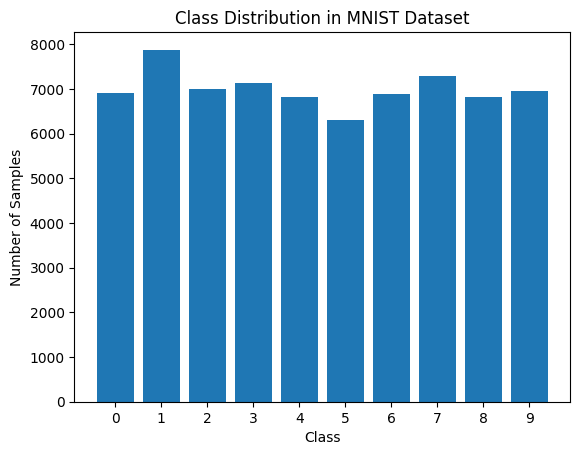

In [36]:
x, y = mnist.data, mnist.target.astype(int)
class_counts = Counter(y)
print(class_counts)
counts = [class_counts[i] for i in range(10)]
class_labels = [str(i) for i in range(10)]

plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

**Penjelasan:**

Kode program tersebut bertujuan untuk menghitung jumlah sampel untuk setiap kelas (digit 0-9) dalam dataset MNIST dan kemudian memvisualisasikan distribusinya dalam bentuk diagram batang.
* **x, y = mnist.data, mnist.target.astype(int)**:
  * Baris ini mengambil data dan label dari objek mnist (yang diasumsikan sudah diunduh sebelumnya) dan menyimpannya ke dalam variabel x dan y.
  * **x** berisi data gambar, dan y berisi label digit (0-9) yang sesuai dengan setiap gambar. astype(int) memastikan label berupa integer.
* **class_counts = Counter(y)**:
  * Baris ini menggunakan Counter dari modul collections untuk menghitung frekuensi setiap digit (kelas) dalam label (y).
  * **class_counts** akan menjadi dictionary di mana key adalah digit (0-9) dan value adalah jumlah kemunculannya dalam dataset.
* **print(class_counts)**: Baris ini mencetak dictionary class_counts ke konsol, menampilkan jumlah sampel untuk setiap kelas.
* **counts = [class_counts[i] for i in range(10)]**: Baris ini membuat list counts yang berisi jumlah sampel untuk setiap kelas (digit 0-9) secara berurutan.
* **class_labels = [str(i) for i in range(10)]**: Baris ini membuat list class_labels yang berisi label kelas (digit 0-9) dalam bentuk string. Ini digunakan sebagai label sumbu x pada diagram batang.
* **plt.bar(class_labels, counts)**:
  * Baris ini membuat diagram batang menggunakan Matplotlib.
  * **class_labels** digunakan sebagai label sumbu x, dan counts digunakan sebagai tinggi batang untuk setiap kelas.
* **plt.xlabel('Class')**: Menambahkan label "Class" pada sumbu x.
* **plt.ylabel('Number of Samples')**: Menambahkan label "Number of Samples" pada sumbu y.
* **plt.title('Class Distribution in MNIST Dataset')**: Menambahkan judul "Class Distribution in MNIST Dataset" pada diagram.
* **plt.show()**: Menampilkan diagram batang yang telah dibuat.

**Hasil yang Didapat:**
  * **Output print(class_counts)**: Menampilkan dictionary yang menunjukkan jumlah sampel untuk setiap kelas (digit 0-9) dalam dataset MNIST.
  * **Diagram batang**: Diagram batang akan memvisualisasikan distribusi kelas dalam dataset MNIST. Sumbu x menunjukkan kelas (digit 0-9), dan sumbu y menunjukkan jumlah sampel untuk setiap kelas. Tinggi batang menunjukkan seberapa banyak data yang ada untuk setiap kelas.
  
---

**Langkah 4 - Split Data**

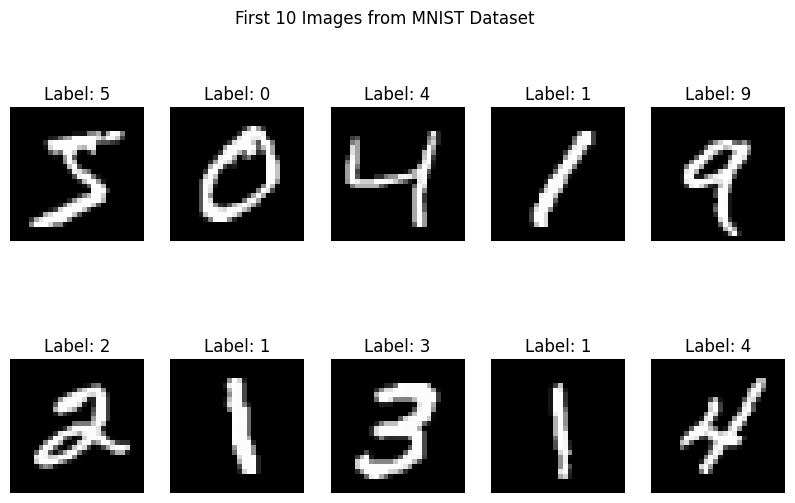

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_convert = X.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

**Penjelasan:**

Kode program tersebut bertujuan untuk membagi dataset MNIST menjadi data latih dan data uji, mengonversi data gambar ke tipe data integer, dan menampilkan 10 gambar pertama dari dataset MNIST beserta labelnya.
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)**:
  * Baris ini menggunakan fungsi train_test_split dari scikit-learn untuk membagi dataset MNIST (X dan y) menjadi data latih (X_train, y_train) dan data uji (X_test, y_test).
  * **test_size=0.2** menunjukkan bahwa 20% dari data akan digunakan sebagai data uji, dan sisanya (80%) sebagai data latih.
* **x_convert = X.values.astype(int)**: Baris ini mengonversi data gambar (X) ke tipe data integer menggunakan .astype(int). Ini dilakukan agar data gambar dapat ditampilkan dengan benar menggunakan plt.imshow.
* **plt.figure(figsize=(10, 6))**:Baris ini membuat figure (area plot) dengan ukuran 10x6 inci.
* **for i in range(10): ...**:
  * Loop ini akan diulang sebanyak 10 kali untuk menampilkan 10 gambar pertama dari dataset.
  * **plt.subplot(2, 5, i + 1)**: Membuat subplot (area plot kecil) dalam grid 2x5.
  * **plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')**: Menampilkan gambar ke-i dari dataset. reshape(28, 28) digunakan untuk mengubah bentuk data gambar menjadi 28x28 piksel. cmap='gray' digunakan untuk menampilkan gambar dalam skala abu-abu.
  * **plt.title(f"Label: {y[i]}")**: Menambahkan judul pada subplot yang menunjukkan label dari gambar.
  * **plt.axis('off')**: Menonaktifkan label sumbu pada subplot.
* **plt.suptitle('First 10 Images from MNIST Dataset')**: Menambahkan judul utama pada figure.
* **plt.show()**: Menampilkan figure yang berisi 10 gambar MNIST beserta labelnya.

**Hasil yang Didapat:**
  * Setelah kode ini dijalankan, akan mendapatkan:
    * **Data latih dan data uji**: Dataset MNIST akan dibagi menjadi data latih (X_train, y_train) dan data uji (X_test, y_test).
    * **Data gambar integer**: Data gambar MNIST akan dikonversi ke tipe data integer.
    * **Visualisasi 10 gambar pertama**: Akan ditampilkan figure yang berisi 10 gambar pertama dari dataset MNIST beserta labelnya dalam grid 2x5. Setiap subplot akan menampilkan satu gambar dan labelnya.
    
---

**Langkah 5 - Normalisasi**

In [38]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train = X_train / 255.0
X_test = X_test / 255.0

**Penjelasan:**

Kode program tersebut bertujuan untuk menormalisasi data gambar dalam dataset MNIST, yang tersimpan dalam variabel X_train dan X_test. Normalisasi dilakukan dalam dua langkah untuk mempersiapkan data sebelum digunakan untuk melatih model machine learning.
* **X_train = tf.keras.utils.normalize(X_train, axis=1) dan X_test = tf.keras.utils.normalize(X_test, axis=1)**:
  * Baris ini melakukan normalisasi L2 pada setiap baris (gambar) dari data X_train dan X_test. Normalisasi L2 mengubah setiap baris data sehingga memiliki panjang vektor (magnitude) sebesar 1.
  * Normalisasi ini penting untuk meningkatkan kinerja model machine learning. Dengan membuat data berada dalam skala yang sama, model dapat belajar lebih efisien dan mencegah fitur dengan nilai besar mendominasi fitur dengan nilai kecil.
  * **Hasil**: Nilai piksel dalam X_train dan X_test akan diubah sehingga setiap baris (gambar) memiliki panjang vektor 1.
* **X_train = X_train / 255.0 dan X_test = X_test / 255.0**:
  * Baris ini melakukan penskalaan pada data X_train dan X_test dengan membagi setiap nilai piksel dengan 255.0.
  * Nilai piksel dalam gambar MNIST biasanya berada dalam rentang 0-255. Dengan membagi dengan 255.0, nilai piksel akan diubah ke rentang 0-1. Penskalaan ini membantu model machine learning untuk belajar lebih efisien dan mencegah masalah overflow atau underflow numerik.
  * **Hasil**: Nilai piksel dalam X_train dan X_test akan berada dalam rentang 0-1.

**Hasil yang Didapat:**
  * Setelah kedua langkah normalisasi ini, data gambar dalam X_train dan X_test akan memiliki karakteristik berikut:
    * **Terskala**: Nilai piksel berada dalam rentang 0-1, sehingga data lebih mudah diproses oleh model machine learning.
    * **Dinormalisasi:** Setiap baris (gambar) memiliki panjang vektor 1 (setelah langkah pertama), memastikan bahwa fitur dengan nilai besar tidak mendominasi fitur dengan nilai kecil.
    
---

**Langkah 6 - ANN Modeling**

In [39]:
ann = tf.keras.models.Sequential()

**Penjelasan:**

Kode program tersebut bertujuan untuk menginisialisasi model Artificial Neural Network (ANN) dengan arsitektur sequential menggunakan library TensorFlow dan Keras. Model sequential adalah jenis model ANN yang paling sederhana, di mana lapisan-lapisan disusun secara berurutan.
* **tf.keras.models.Sequential()**: Ini adalah konstruktor dari kelas Sequential di TensorFlow/Keras. Ketika dipanggil, ia akan membuat objek model ANN baru yang kosong dengan arsitektur sequential.
* **ann = ...**: Objek model ANN yang baru dibuat disimpan dalam variabel ann. Variabel ini selanjutnya akan digunakan untuk menambahkan lapisan-lapisan ke model, mengompilasi model, dan melatih model.

**Hasil yang Didapat:**
* Setelah kode ini dijalankan, akan mendapatkan:
    * **Objek model ANN**: Variabel ann akan berisi objek model ANN sequential yang kosong. Model ini belum memiliki lapisan apa pun dan belum siap untuk digunakan.
    
---

**Langkah 7 - Building Layer**

In [40]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

ann.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

**Penjelasan:**

Kode program tersebut bertujuan untuk membangun arsitektur model Artificial Neural Network (ANN) dan menampilkan ringkasannya. Model ini dirancang untuk mengklasifikasikan gambar digit tulisan tangan dari dataset MNIST.
* **ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))**:
  * Menambahkan lapisan Dense (fully connected) pertama ke model ann.
  * **Parameter**:
    * **units=128**: Lapisan ini memiliki 128 neuron (unit).
    * **activation='relu'**: Fungsi aktivasi yang digunakan adalah ReLU (Rectified Linear Unit).
    * **input_shape=(784,)**: Menentukan bentuk input yang diharapkan oleh model. Dalam kasus MNIST, setiap gambar direpresentasikan sebagai vektor 784 piksel (28x28).
  * Lapisan ini menerima input gambar dan melakukan transformasi linier, diikuti oleh fungsi aktivasi ReLU untuk memperkenalkan non-linearitas ke model.
* **ann.add(tf.keras.layers.Dense(units=128, activation='relu'))**:
  * Menambahkan lapisan Dense kedua ke model.
  * **Parameter**:
    * **units=128**: Lapisan ini memiliki 128 neuron.
    * **activation='relu'**: Fungsi aktivasi yang digunakan adalah ReLU.
  * Lapisan ini menerima output dari lapisan sebelumnya dan melakukan transformasi linier, diikuti oleh fungsi aktivasi ReLU.
* **ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))**:
  * Menambahkan lapisan Dense ketiga (lapisan output) ke model.
  * **Parameter**:
    * **units=10**: Lapisan ini memiliki 10 neuron, merepresentasikan 10 kelas digit (0-9).
    * **activation='softmax'**: Fungsi aktivasi yang digunakan adalah softmax.
  * Lapisan ini menerima output dari lapisan sebelumnya dan menghasilkan probabilitas untuk setiap kelas digit. Fungsi aktivasi softmax memastikan bahwa probabilitas semua kelas berjumlah 1.
* **ann.summary()**:
  * Menampilkan ringkasan arsitektur model, termasuk jumlah parameter di setiap lapisan.
  * Akan mencetak tabel yang menunjukkan lapisan-lapisan model, bentuk output setiap lapisan, dan jumlah parameter yang dapat dipelajari.

**Hasil yang Didapat:**
  * Setelah kode ini dijalankan, akan mendapatkan:
    * **Model ANN dengan 3 lapisan Dense**: Model ann akan memiliki arsitektur sequential dengan 3 lapisan Dense.
    * **Ringkasan model**: Fungsi ann.summary() akan mencetak ringkasan model ke konsol, memberikan informasi tentang lapisan-lapisan, bentuk output, dan jumlah parameter.
    
---

**Langkah 8 - Compiling ANN Model**

In [41]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Penjelasan:**

Kode program tersebut bertujuan untuk mengkonfigurasi proses pelatihan model Artificial Neural Network (ANN) yang telah dibuat sebelumnya. Proses konfigurasi ini disebut compiling dalam Keras.
* **ann.compile(...)**: Fungsi ini digunakan untuk mengkonfigurasi model ann sebelum pelatihan.
* **optimizer='adam'**: Menentukan algoritma optimasi yang akan digunakan untuk memperbarui bobot model selama pelatihan. 'adam' adalah algoritma optimasi yang populer dan efisien.
* **loss='sparse_categorical_crossentropy'**: Menentukan fungsi loss yang akan digunakan untuk mengukur kesalahan prediksi model. 'sparse_categorical_crossentropy' adalah fungsi loss yang umum digunakan untuk masalah klasifikasi multi-kelas dengan label berupa integer.
* **metrics=['accuracy']**: Menentukan metrik yang akan digunakan untuk mengevaluasi kinerja model selama pelatihan dan pengujian. 'accuracy' adalah metrik yang umum digunakan untuk mengukur persentase prediksi yang benar.

**Hasil yang Didapat:**
  * Setelah kode ini dijalankan, model ann akan siap untuk dilatih. Model ini telah dikonfigurasi dengan algoritma optimasi 'adam', fungsi loss 'sparse_categorical_crossentropy', dan metrik evaluasi 'accuracy'.
  
---

**Langkah 9 - Fitting**

In [42]:
ann.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1694 - loss: 2.2135 - val_accuracy: 0.5216 - val_loss: 1.4097
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5618 - loss: 1.2960 - val_accuracy: 0.6717 - val_loss: 1.0068
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6928 - loss: 0.9409 - val_accuracy: 0.7414 - val_loss: 0.8008
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7455 - loss: 0.7759 - val_accuracy: 0.7729 - val_loss: 0.7143
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7734 - loss: 0.7094 - val_accuracy: 0.7838 - val_loss: 0.6784
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7874 - loss: 0.6664 - val_accuracy: 0.7948 - val_loss: 0.6523
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7992 - loss: 0.6493 - val_accuracy: 0.8059 - val_loss: 0.6255
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8078 - loss: 0.6241 - val_accura

**Penjelasan:**

Kode program tersebut merupakan inti dari proses pelatihan model Artificial Neural Network (ANN) yang telah diinisialisasi sebelumnya. Fungsi fit() digunakan untuk melatih model ANN menggunakan data latih (X_train, y_train).
* **Parameter**:
  * **X_train**: Data fitur (input) yang digunakan untuk melatih model.
  * **y_train**: Data target (output) yang sesuai dengan X_train, digunakan untuk melatih model.
  * **epochs=50**: Jumlah epoch atau iterasi pelatihan. Satu epoch berarti model telah melihat seluruh data latih sekali.
    * Nilai 50 berarti model akan dilatih selama 50 epoch, melewati seluruh data latih sebanyak 50 kali.
  * **batch_size=100**: Jumlah sampel data yang diproses sebelum bobot model diperbarui.
    * Nilai 100 berarti model akan memproses 100 sampel data, menghitung error, dan kemudian memperbarui bobotnya. Proses ini diulang hingga seluruh data latih dalam satu epoch selesai diproses.
  * **validation_data=(X_test, y_test)**: Data yang digunakan untuk validasi model selama pelatihan.
    * Model akan dievaluasi menggunakan data validasi (X_test, y_test) di setiap epoch. Ini membantu untuk memantau kinerja model pada data yang belum pernah dilihat sebelumnya dan mencegah overfitting (model terlalu menyesuaikan diri dengan data latih).

**Hasil yang Didapat:**
  * Setelah kode program dijalankan, model ANN akan dilatih dan bobot-bobot internalnya akan disesuaikan untuk meminimalkan error prediksi.

---

**Langkah 10 - Evaluating**

In [43]:
loss, accuracy = ann.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9423 - loss: 0.1894
Loss: 0.2035100758075714
Accuracy: 0.9377856850624084


**Penjelasan:**

Kode program tersebut bertujuan untuk mengevaluasi kinerja model Artificial Neural Network (ANN) yang telah dilatih sebelumnya menggunakan data uji (X_test dan y_test).
* **loss, accuracy = ann.evaluate(X_test, y_test)**:
  * Fungsi evaluate() pada model ann digunakan untuk menghitung loss dan akurasi model pada data uji.
  * **Parameter**:
    * **X_test**: Data input (gambar) untuk pengujian.
    * **y_test**: Label yang benar untuk data uji.
  * Fungsi evaluate() mengembalikan dua nilai: loss dan akurasi. Nilai-nilai ini disimpan dalam variabel loss dan accuracy.
* **print(f"Loss: {loss}") dan print(f"Accuracy: {accuracy}")**:
  * Baris ini mencetak nilai loss dan akurasi ke konsol.
  * Akan melihat output yang menunjukkan nilai loss dan akurasi model pada data uji.

**Hasil yang Didapat:**
  * Setelah kode ini dijalankan, akan mendapatkan:
    * **Nilai loss**: Menunjukkan seberapa besar kesalahan prediksi model pada data uji. Semakin rendah nilai loss, semakin baik kinerja model.
    * **Nilai akurasi**: Menunjukkan persentase prediksi yang benar oleh model pada data uji. Semakin tinggi nilai akurasi, semakin baik kinerja model.
    
---

**Langkah 11 - Confusion Matrix**

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


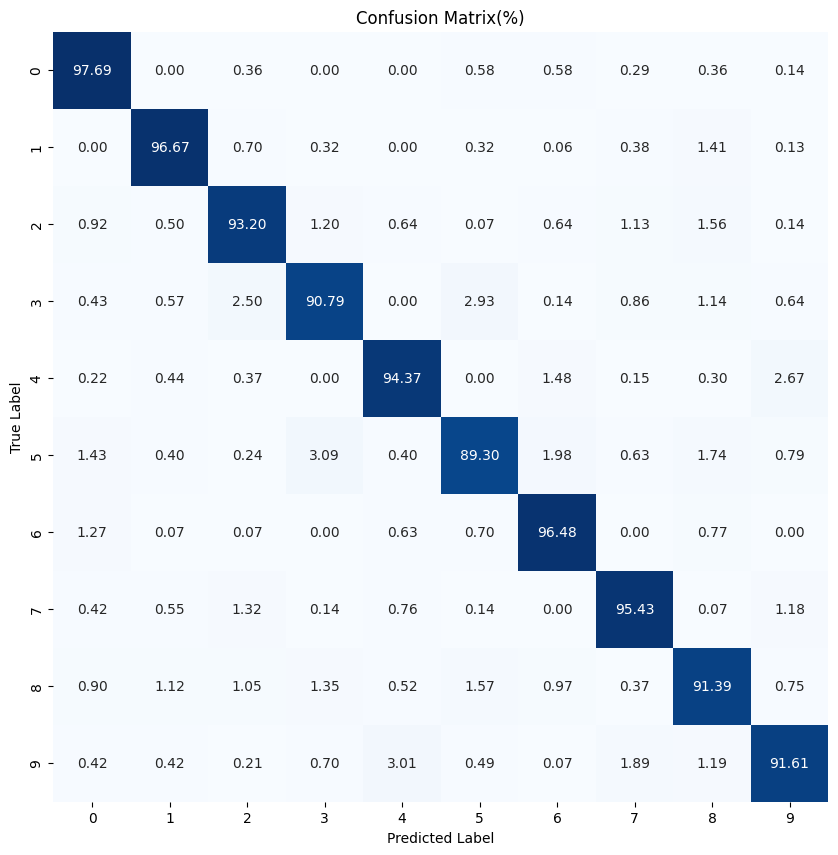

In [44]:
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm_percent, annot=True, ax=ax, cmap='Blues', fmt='.2f', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix(%)')

class_names = [str(i) for i in range(10)]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

**Penjelasan:**

Kode program tersebut bertujuan untuk mengevaluasi kinerja model Artificial Neural Network (ANN) yang telah dilatih sebelumnya menggunakan data uji (X_test dan y_test), dan kemudian memvisualisasikan hasilnya dalam bentuk confusion matrix.
* **y_pred = ann.predict(X_test)**:
  * Model ann digunakan untuk memprediksi label dari data uji (X_test). Hasil prediksi disimpan dalam variabel y_pred.
  * **Hasil**: y_pred akan berisi probabilitas untuk setiap kelas (digit 0-9) untuk setiap gambar dalam data uji.
* **y_pred = np.argmax(y_pred, axis=1)**:
  * Mengubah probabilitas prediksi menjadi label kelas yang diprediksi. Fungsi argmax digunakan untuk menemukan indeks (kelas) dengan probabilitas tertinggi untuk setiap gambar.
  * **Hasil**: y_pred sekarang berisi label kelas yang diprediksi untuk setiap gambar dalam data uji.
* **cm = confusion_matrix(y_test, y_pred)**:
  * Membuat confusion matrix dengan membandingkan label yang benar (y_test) dengan label yang diprediksi (y_pred).
  * **Hasil**: cm akan berisi confusion matrix yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
* **cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100**:
  * Mengubah nilai dalam confusion matrix menjadi persentase.
  * **Hasil**: cm_percent akan berisi confusion matrix dalam bentuk persentase, menunjukkan persentase prediksi yang benar dan salah untuk setiap kelas.
* **fig, ax = plt.subplots(figsize=(10, 10))**:
  * Membuat figure dan axes untuk plot confusion matrix.
  * **Hasil**: fig akan berisi figure, dan ax akan berisi axes yang akan digunakan untuk menampilkan confusion matrix.
* **sns.heatmap(cm_percent, annot=True, ax=ax, cmap='Blues', fmt='.2f', cbar=False)**:
  * Membuat heatmap dari confusion matrix menggunakan Seaborn.
  * **Parameter**:
    * **cm_percent**: Data confusion matrix dalam bentuk persentase.
    * **annot=True**: Menampilkan nilai dalam setiap sel heatmap.
    * **ax=ax**: Menampilkan heatmap pada axes yang telah dibuat.
    * **cmap='Blues'**: Menggunakan colormap 'Blues' untuk heatmap.
    * **fmt='.2f'**: Menampilkan nilai dengan 2 angka di belakang koma.
    * **cbar=False**: Menonaktifkan colorbar.
  * **Hasil**: Heatmap dari confusion matrix akan ditampilkan pada figure.
* **ax.set_xlabel('Predicted Label'), ax.set_ylabel('True Label'), ax.set_title('Confusion Matrix(%)')**:
  * Menambahkan label dan judul pada heatmap.
  * **Hasil**: Heatmap akan memiliki label sumbu x, label sumbu y, dan judul.
* **class_names = [str(i) for i in range(10)], ax.xaxis.set_ticklabels(class_names), ax.yaxis.set_ticklabels(class_names)**:
  * Menambahkan label kelas (digit 0-9) pada sumbu x dan sumbu y heatmap.
  * **Hasil**: Heatmap akan memiliki label kelas pada sumbu x dan sumbu y.
* **plt.show()**:
  * Menampilkan figure yang berisi heatmap dari confusion matrix.
  * **Hasil**: Heatmap confusion matrix akan ditampilkan.

**Hasil yang Didapat:**
* Setelah kode ini dijalankan, akan mendapatkan:
  * **Prediksi label**: Model akan memprediksi label untuk data uji.
  * **Confusion matrix**: Confusion matrix akan dihitung dan ditampilkan dalam bentuk heatmap. Heatmap ini menunjukkan persentase prediksi yang benar dan salah untuk setiap kelas (digit 0-9).
  
---